In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

import umap

# ------------------------
# Load data
# ------------------------
df = pd.read_csv(r"C:/Users/HELIOS-300/Desktop/MATLAB/NasaDataCapstone/data/features.csv")

# Separate metadata and features
file_names = df["file_name"]
X = df.drop(columns=["file_name"])

# ------------------------
# Scale features
# ------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\HELIOS-300\Desktop\MATLAB\NasaDataCapstone\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


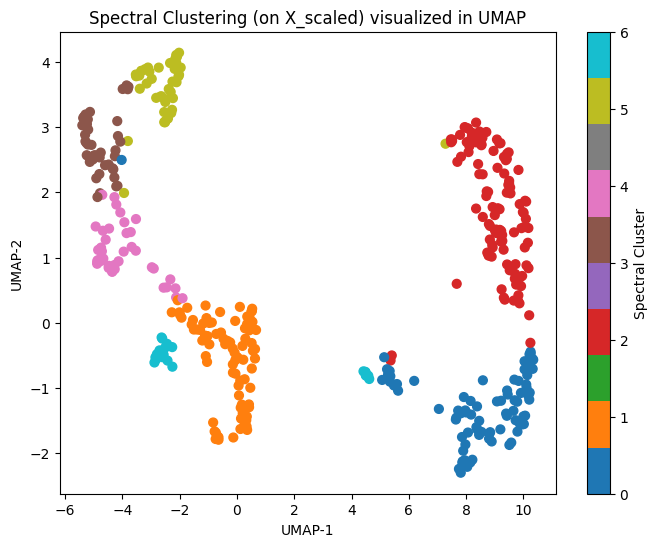

In [6]:
# ============================================================
# OPTION A (Recommended): Spectral clustering on kNN graph of ORIGINAL space
#   - This is the "proper" spectral clustering pipeline.
#   - Avoids UMAP distortion for the clustering step.
# ============================================================

# --- choose k for the kNN graph (often similar-ish to UMAP n_neighbors) ---
k = 15

# Build sparse kNN connectivity graph (order-invariant except for exact distance ties)
connectivity = kneighbors_graph(
    X_scaled,
    n_neighbors=k,
    mode="connectivity",     # unweighted adjacency; try "distance" if you want weights
    include_self=False,
    metric="minkowski",      # Euclidean
    p=2,
    n_jobs=-1
)

spectral = SpectralClustering(
    n_clusters=7,            # <-- SET THIS (see note below)
    affinity="nearest_neighbors",
    n_neighbors=k,
    assign_labels="kmeans",  # "kmeans" is common; "discretize" can be more deterministic/stable
    random_state=42
)

labels_spec = spectral.fit_predict(X_scaled)

df["cluster_spectral"] = labels_spec

# --- Visualization (use UMAP only for plotting, not for clustering) ---
umap_vis = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric="euclidean",
    random_state=42
)
X_umap_vis = umap_vis.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_vis[:, 0],
    X_umap_vis[:, 1],
    c=labels_spec,
    cmap="tab10",
    s=40
)
plt.colorbar(label="Spectral Cluster")
plt.title("Spectral Clustering (on X_scaled) visualized in UMAP")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()